**Startups**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving 50_Startups.csv to 50_Startups.csv


In [ ]:
Startups=pd.read_csv('50_Startups.csv')
Startups.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


**EDA**

In [ ]:
Startups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [ ]:
Startups[Startups.duplicated()].shape

(0, 5)

In [ ]:
Startups.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [ ]:
SU=Startups.rename({'R&D Spend':'RDS','Administration':'ADMS','Marketing Spend':'MS'},axis=1)
SU.head()

,RDS,ADMS,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


**Correlation**

In [ ]:
SU.corr()

<ipython-input-9-ed32a152223a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  SU.corr()


,RDS,ADMS,MS,Profit
RDS,1.000000,0.241955,0.724248,0.972900
ADMS,0.241955,1.000000,-0.032154,0.200717
MS,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


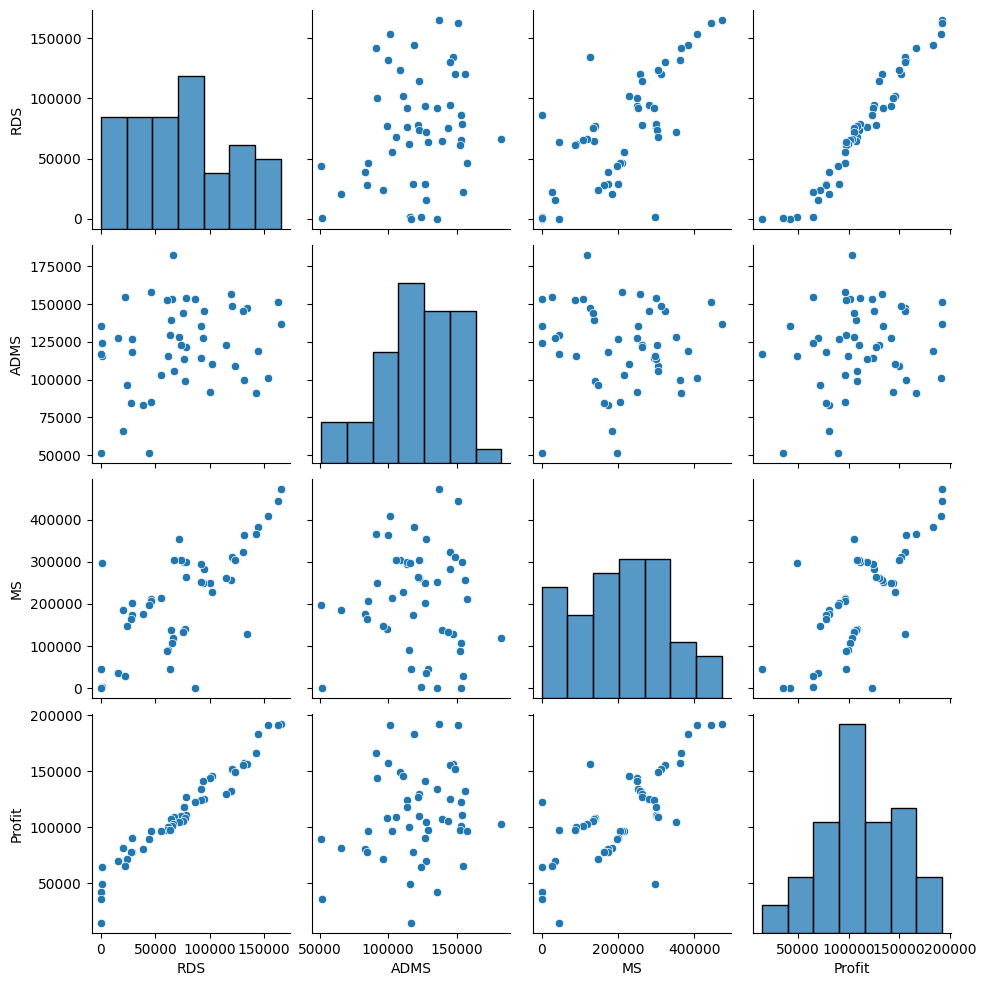

In [ ]:
sns.pairplot(SU)

In [ ]:
#Model Building
model=smf.ols('Profit~RDS+ADMS+MS',data=SU).fit()

In [ ]:
#Testing the model
model.params

Intercept    50122.192990
RDS              0.805715
ADMS            -0.026816
MS               0.027228
dtype: float64

In [ ]:
model.tvalues,'\n',model.pvalues

(Intercept     7.626218
 RDS          17.846374
 ADMS         -0.525507
 MS            1.655077
 dtype: float64,
 '\n',
 Intercept    1.057379e-09
 RDS          2.634968e-22
 ADMS         6.017551e-01
 MS           1.047168e-01
 dtype: float64)

In [ ]:
model.rsquared,model.rsquared_adj

(0.9507459940683246, 0.9475337762901719)

In [ ]:
ml_A=smf.ols('Profit~ADMS',data=SU).fit()
ml_A.tvalues,'\n',ml_A.pvalues

(Intercept    3.040044
 ADMS         1.419493
 dtype: float64,
 '\n',
 Intercept    0.003824
 ADMS         0.162217
 dtype: float64)

In [ ]:
ml_M=smf.ols('Profit~MS',data=SU).fit()
ml_M.tvalues,'\n',ml_M.pvalues

(Intercept    7.808356
 MS           7.802657
 dtype: float64,
 '\n',
 Intercept    4.294735e-10
 MS           4.381073e-10
 dtype: float64)

In [ ]:
ml_AM=smf.ols('Profit~ADMS+MS',data=SU).fit()
ml_AM.tvalues,'\n',ml_AM.pvalues

(Intercept    1.142741
 ADMS         2.467779
 MS           8.281039
 dtype: float64,
 '\n',
 Intercept    2.589341e-01
 ADMS         1.729198e-02
 MS           9.727245e-11
 dtype: float64)

**Model Validation:Collinearity and Residual Analysis**

In [ ]:
rsq_R=smf.ols('RDS~ADMS+MS',data=SU).fit().rsquared
vif_R=1/(1-rsq_R)

rsq_A=smf.ols('ADMS~RDS+MS',data=SU).fit().rsquared
vif_A=1/(1-rsq_A)

rsq_M=smf.ols('MS~RDS+ADMS',data=SU).fit().rsquared
vif_M=1/(1-rsq_M)

d1={'Variables':['RDS','ADMS','MS'],'VIF':[vif_R,vif_A,vif_M]}
pd.DataFrame(d1)

,Variables,VIF
0,RDS,2.468903
1,ADMS,1.175091
2,MS,2.326773


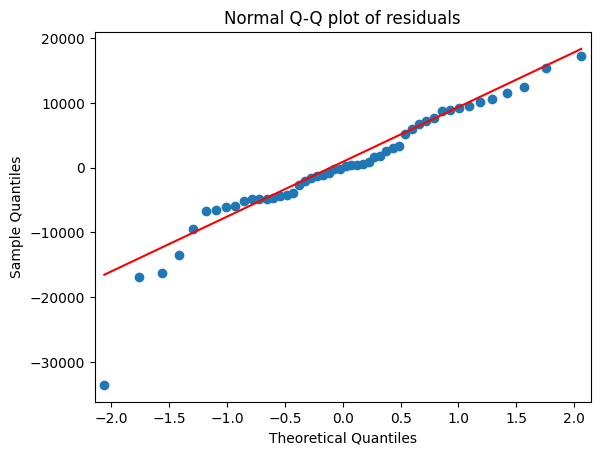

In [ ]:
sm.qqplot(model.resid,line='q');
plt.title('Normal Q-Q plot of residuals');

eval_env: 1


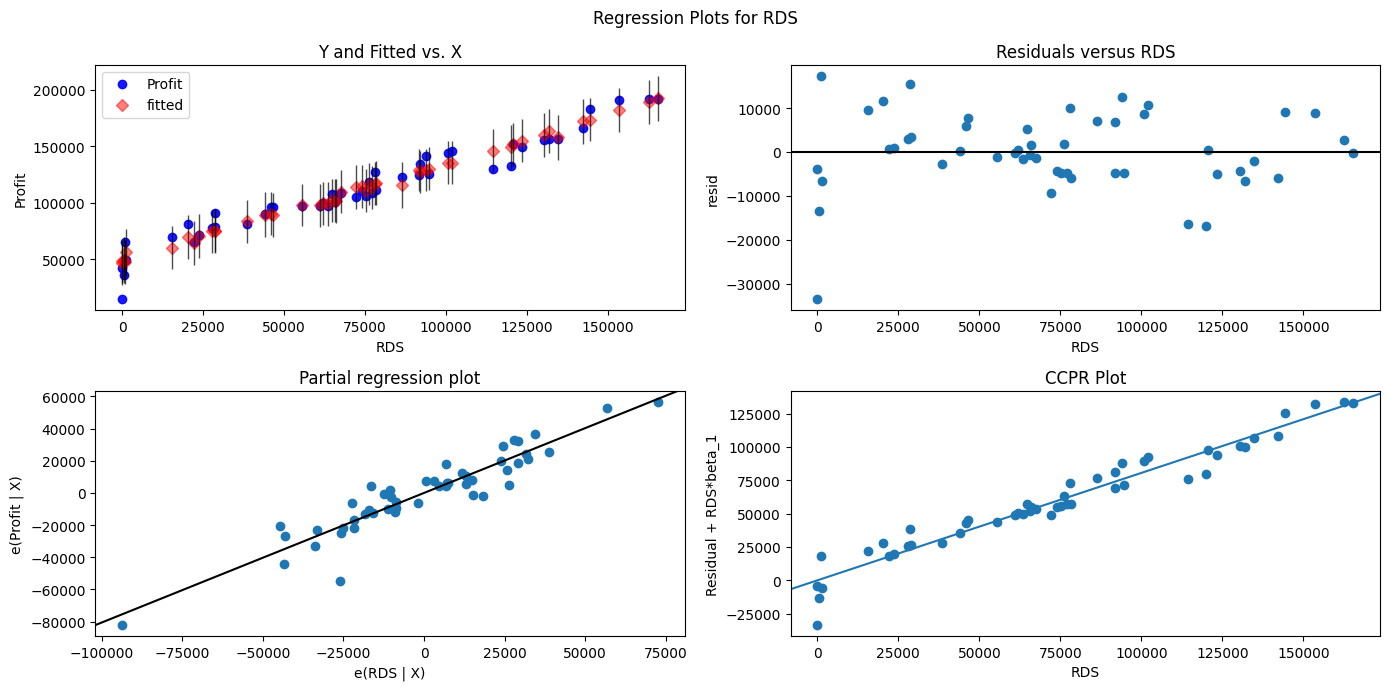

In [ ]:
fig=plt.figure(figsize=(14,7))
sm.graphics.plot_regress_exog(model,'RDS',fig=fig);

eval_env: 1


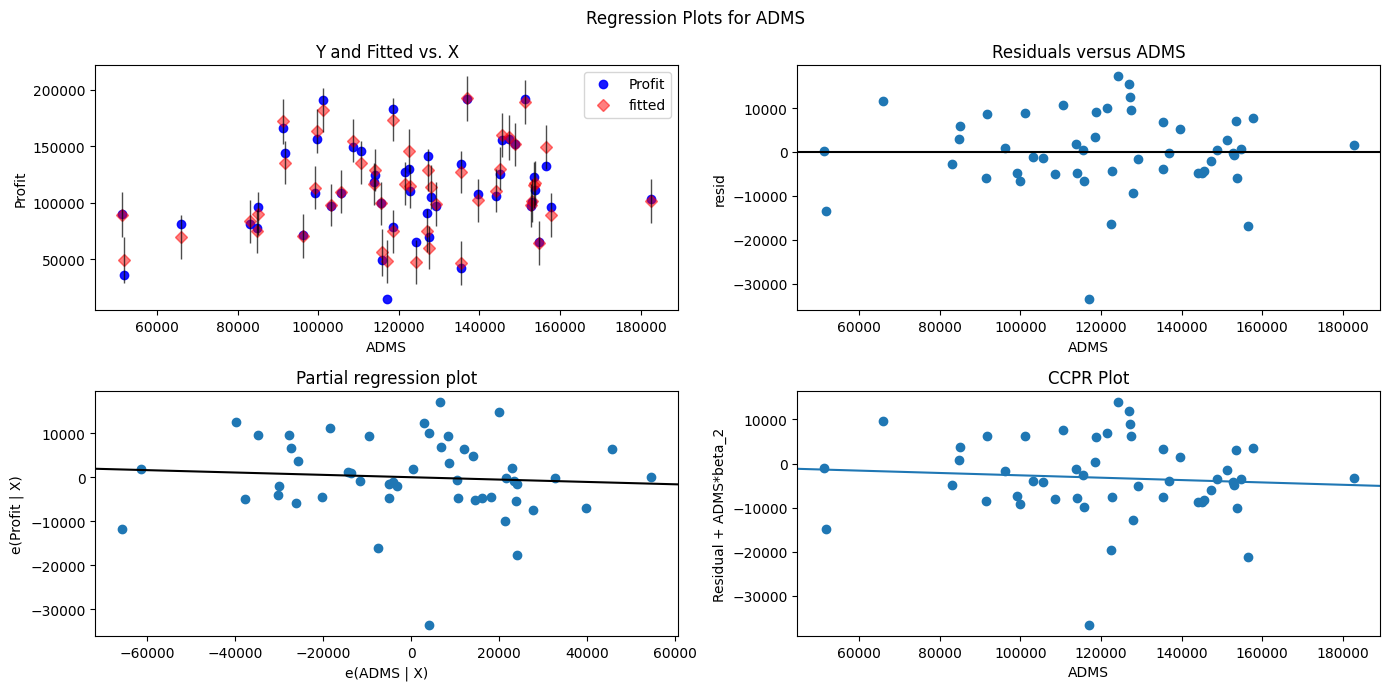

In [ ]:
fig=plt.figure(figsize=(14,7))
sm.graphics.plot_regress_exog(model,'ADMS',fig=fig);

eval_env: 1


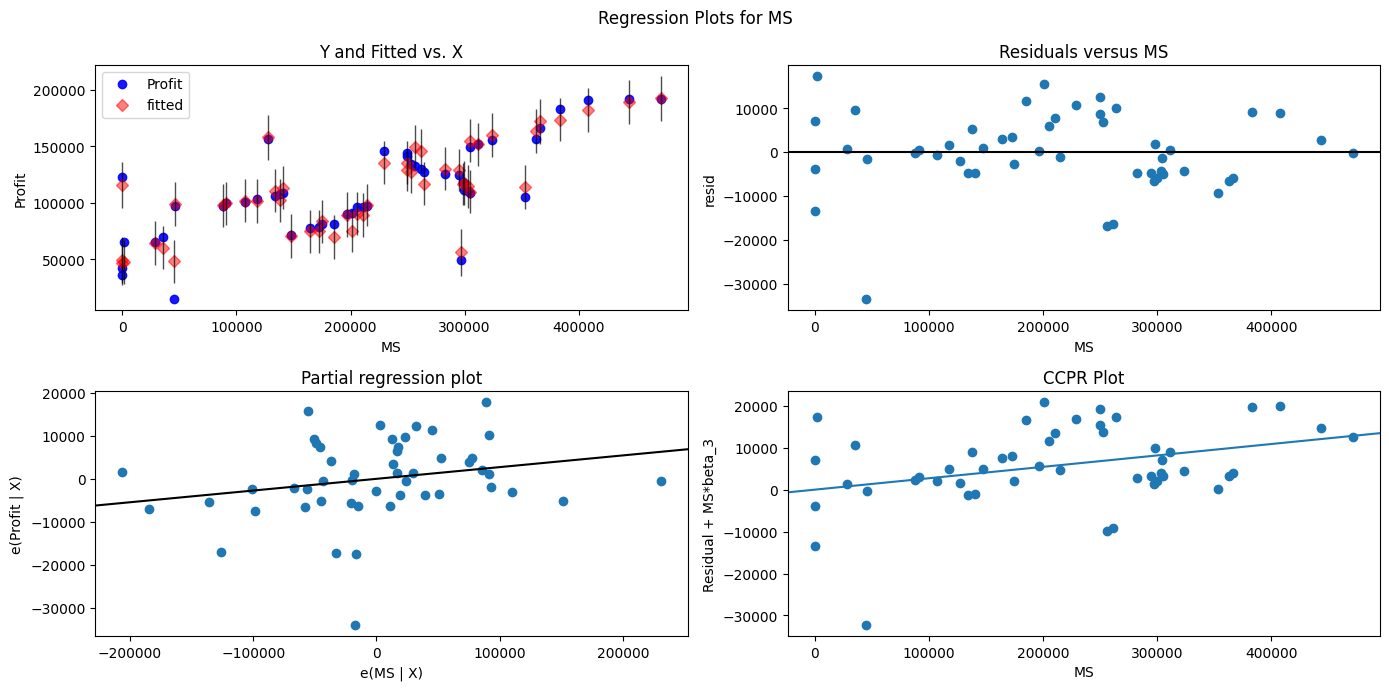

In [ ]:
fig=plt.figure(figsize=(14,7))
sm.graphics.plot_regress_exog(model,'MS',fig=fig);

In [ ]:
#Cook's Distance: If Cook's Distance > 1, then its an outlier
(c,_)=model.get_influence().cooks_distance
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

In [ ]:
np.argmax(c) , np.max(c)

(49, 0.2880822927543272)

In [ ]:
SU[SU.index.isin([49])] 

,RDS,ADMS,MS,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


In [ ]:
SU1=SU.drop(SU.index[[49]],axis=0).reset_index(drop=True)
SU1

,RDS,ADMS,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [ ]:

while np.max(c)>0.5 :
    model=smf.ols("Profit~RDS+ADMS+MKTS",data=SU1).fit()
    (c,_)=model.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    SU1=SU1.drop(SU1.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    SU1
else:
    final_model=smf.ols("Profit~RDS+ADMS+MS",data=SU1).fit()
    final_model.rsquared , final_model.aic
    print("Model accuracy is improved to",final_model.rsquared)

Model accuracy is improved to 0.9613162435129847


**TOYOTA COROLLA**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving ToyotaCorolla.csv to ToyotaCorolla.csv


In [ ]:
TC=pd.read_csv('ToyotaCorolla.csv',encoding='latin1')
TC

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
TC.shape

(1436, 38)

**EDA**

In [ ]:
TC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [ ]:
TC[TC.duplicated()].shape

(0, 38)

In [ ]:
TC=TC[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
TC

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [ ]:
TC.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


**Correlation**

In [ ]:
TC.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


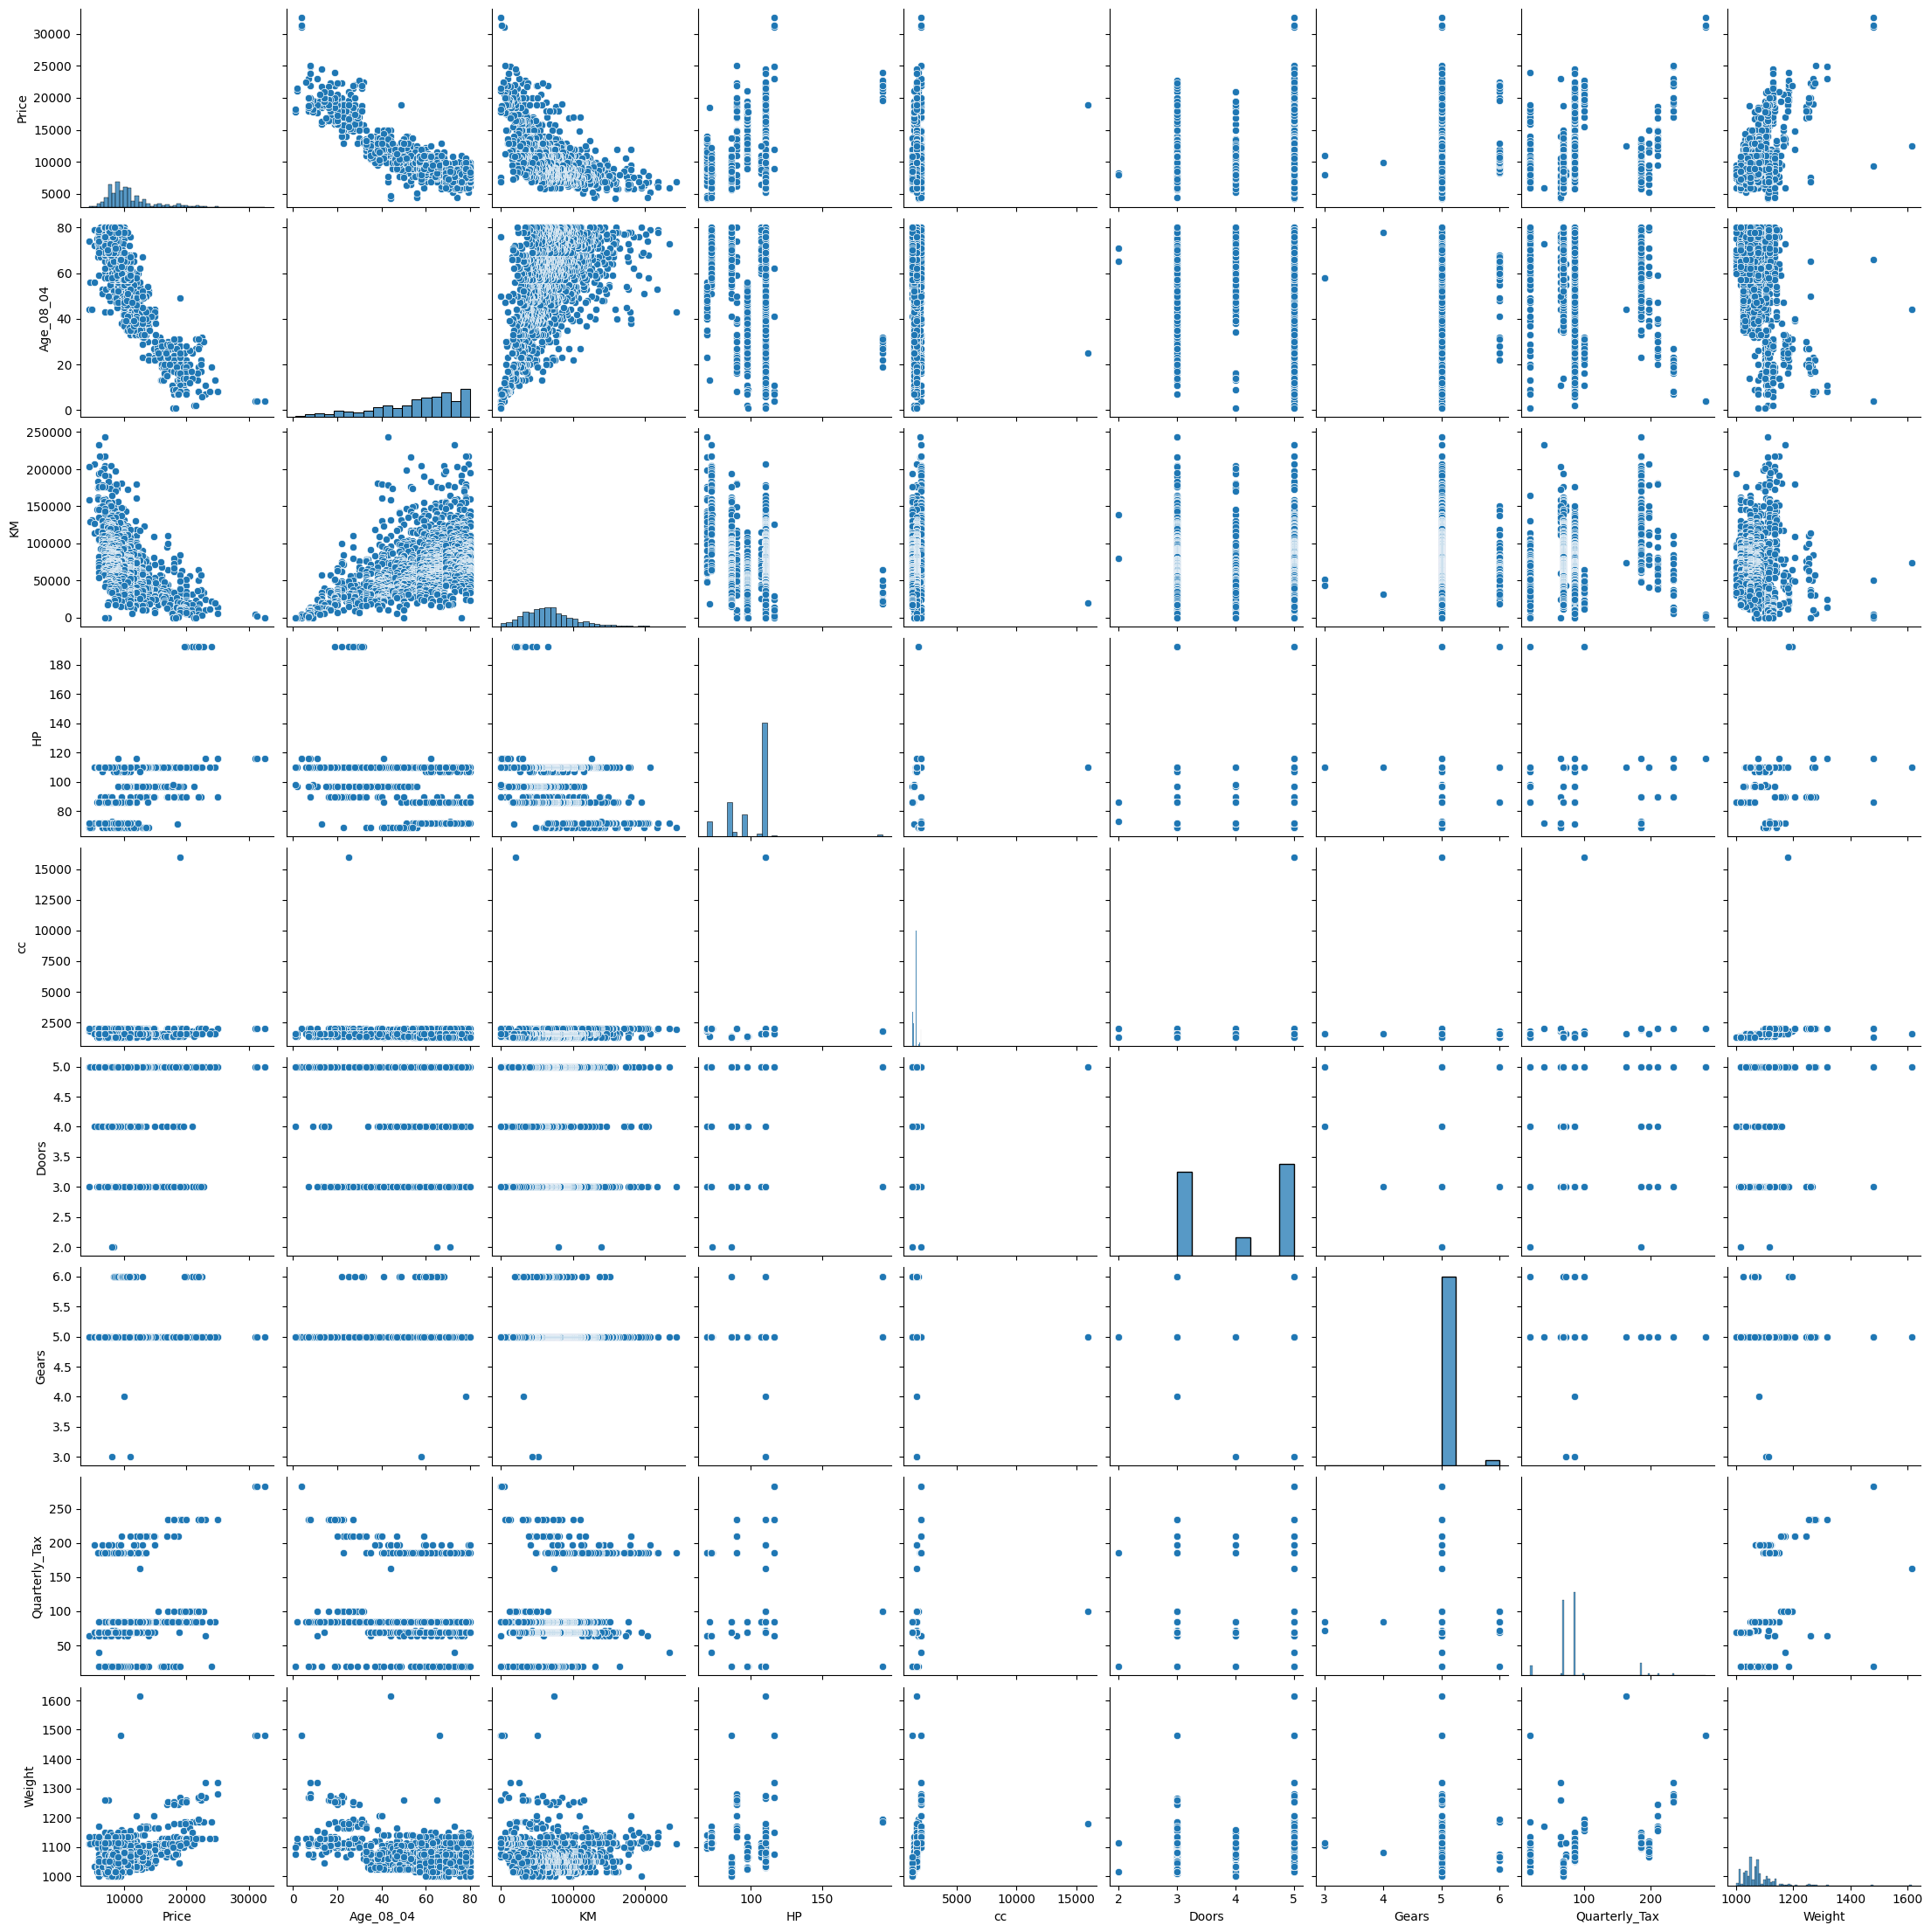

In [ ]:
sns.pairplot(TC)

**Model Building**

In [ ]:
model=smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=TC).fit()

**Testing the model**

In [ ]:
model.params

Intercept       -5573.106358
Age_08_04        -121.658402
KM                 -0.020817
HP                 31.680906
cc                 -0.121100
Doors              -1.616641
Gears             594.319936
Quarterly_Tax       3.949081
Weight             16.958632
dtype: float64

In [ ]:
model.tvalues,'\n',model.pvalues

(Intercept        -3.948666
 Age_08_04       -46.511852
 KM              -16.621622
 HP               11.241018
 cc               -1.344222
 Doors            -0.040410
 Gears             3.016007
 Quarterly_Tax     3.014535
 Weight           15.879803
 dtype: float64,
 '\n',
 Intercept         8.241949e-05
 Age_08_04        3.354724e-288
 KM                7.538439e-57
 HP                3.757218e-28
 cc                1.790902e-01
 Doors             9.677716e-01
 Gears             2.606549e-03
 Quarterly_Tax     2.619148e-03
 Weight            2.048576e-52
 dtype: float64)

In [ ]:
model.rsquared,model.rsquared_adj

(0.8637627463428191, 0.8629989775766962)

In [ ]:
ml_c=smf.ols('Price~cc',data=TC).fit()
ml_c.tvalues,'\n',ml_c.pvalues

(Intercept    24.694090
 cc            4.824822
 dtype: float64,
 '\n',
 Intercept    1.766912e-112
 cc            1.550808e-06
 dtype: float64)

In [ ]:
ml_d=smf.ols('Price~Doors',data=TC).fit()
ml_d.tvalues,'\n',ml_d.pvalues

(Intercept    19.258097
 Doors         7.141657
 dtype: float64,
 '\n',
 Intercept    1.094732e-73
 Doors        1.461237e-12
 dtype: float64)

In [ ]:
ml_cd=smf.ols('Price~cc+Doors',data=TC).fit()
ml_cd.tvalues,'\n',ml_cd.pvalues

(Intercept    12.620704
 cc            4.340400
 Doors         6.816153
 dtype: float64,
 '\n',
 Intercept    1.056885e-34
 cc           1.521992e-05
 Doors        1.373469e-11
 dtype: float64)

In [ ]:
#Model Validation
rsq_A=smf.ols('Age_08_04~KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=TC).fit().rsquared
vif_A=1/(1-rsq_A)

rsq_K=smf.ols('KM~Age_08_04+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=TC).fit().rsquared
vif_K=1/(1-rsq_K)

rsq_C=smf.ols('cc~Age_08_04+HP+KM+Doors+Gears+Quarterly_Tax+Weight',data=TC).fit().rsquared
vif_C=1/(1-rsq_C)

rsq_H=smf.ols('HP~Age_08_04+KM+cc+Doors+Gears+Quarterly_Tax+Weight',data=TC).fit().rsquared
vif_H=1/(1-rsq_H)

rsq_D=smf.ols('Doors~Age_08_04+HP+cc+KM+Gears+Quarterly_Tax+Weight',data=TC).fit().rsquared
vif_D=1/(1-rsq_D)

rsq_G=smf.ols('Gears~Age_08_04+HP+cc+Doors+KM+Quarterly_Tax+Weight',data=TC).fit().rsquared
vif_G=1/(1-rsq_G)

rsq_Q=smf.ols('Quarterly_Tax~Age_08_04+HP+cc+Doors+Gears+KM+Weight',data=TC).fit().rsquared
vif_Q=1/(1-rsq_Q)

rsq_W=smf.ols('Weight~Age_08_04+HP+cc+Doors+Gears+KM+Quarterly_Tax',data=TC).fit().rsquared
vif_W=1/(1-rsq_W)

d1={'Variables':['Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight'],'VIF':[vif_A,vif_K,vif_H,vif_C,vif_D,vif_G,vif_Q,vif_W]}
pd.DataFrame(d1)

,Variables,VIF
0,Age_08_04,1.884620
1,KM,1.756905
2,HP,1.419422
3,cc,1.163894
4,Doors,1.156575
5,Gears,1.098723
6,Quarterly_Tax,2.311431
7,Weight,2.516420


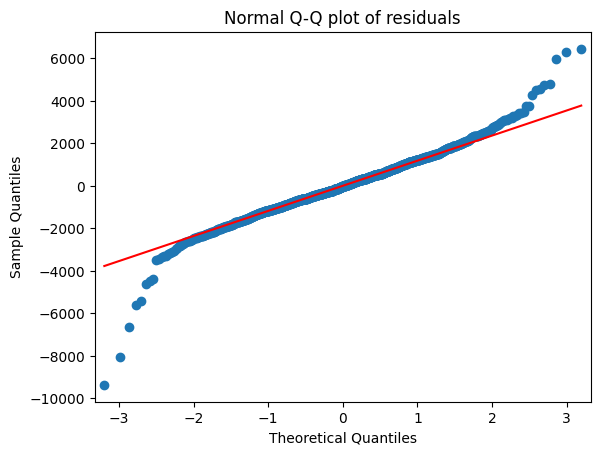

In [ ]:
sm.qqplot(model.resid,line='q');
plt.title('Normal Q-Q plot of residuals');

eval_env: 1


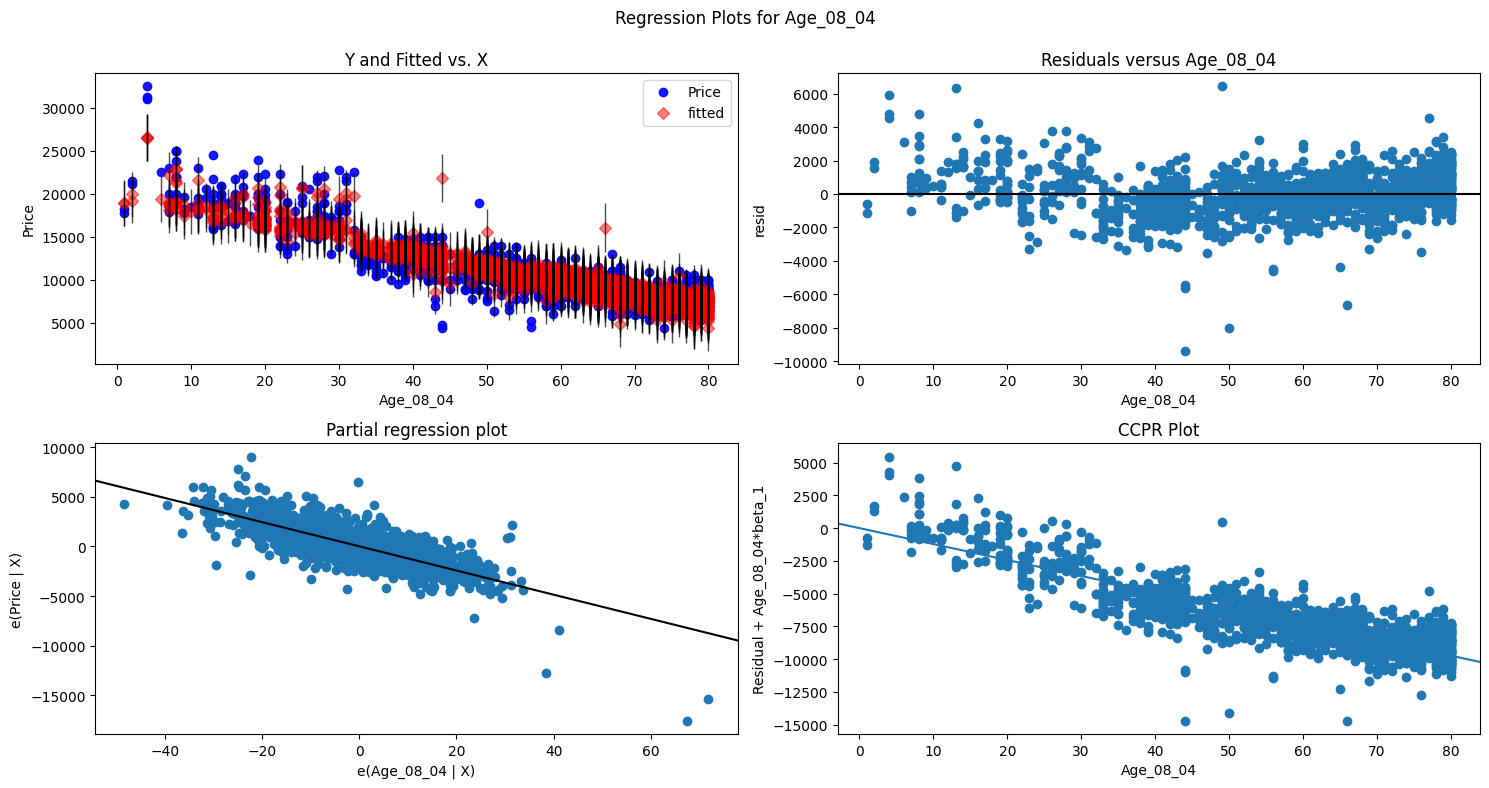

In [ ]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Age_08_04',fig=fig);

eval_env: 1


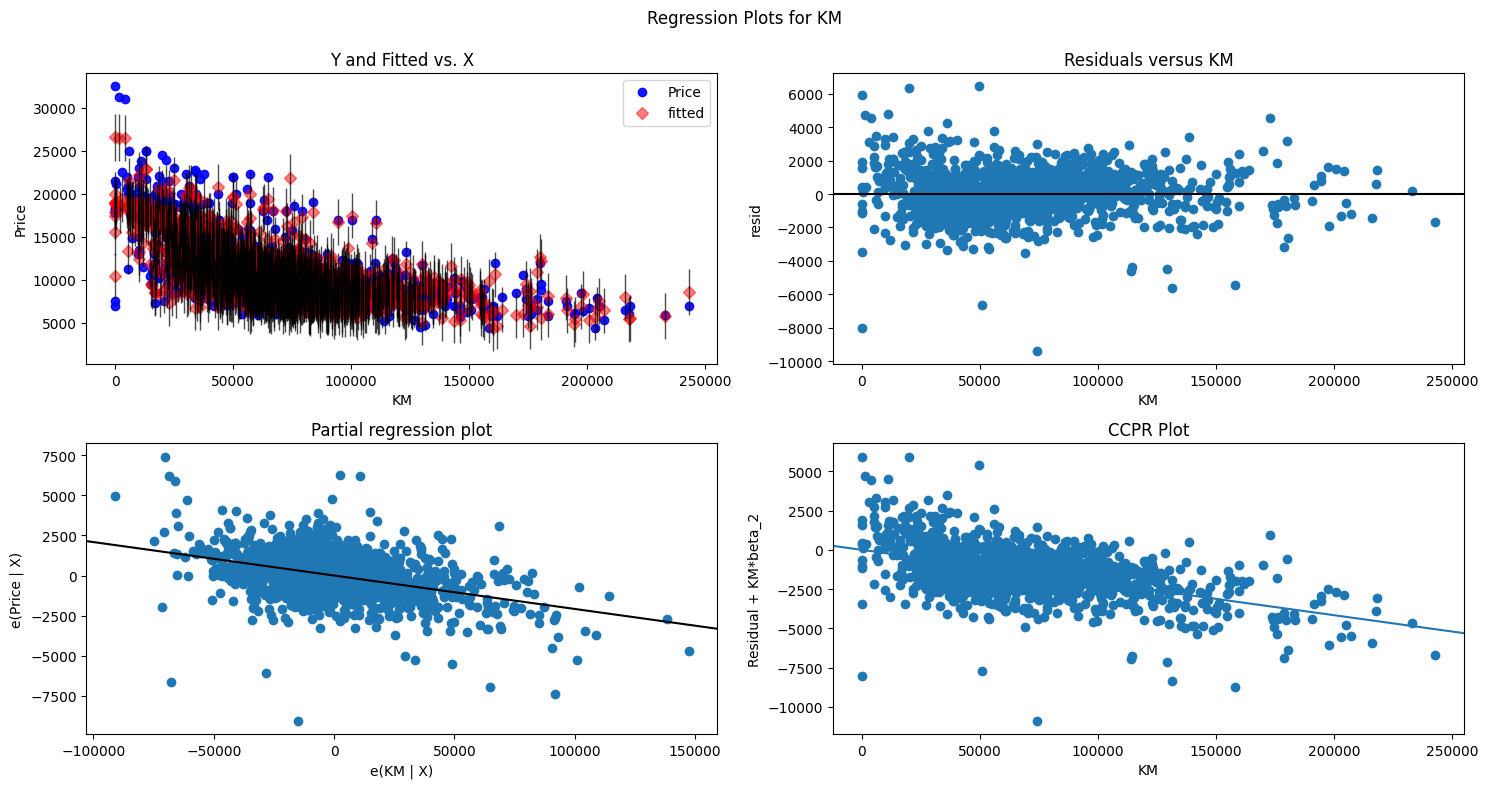

In [ ]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'KM',fig=fig);

eval_env: 1


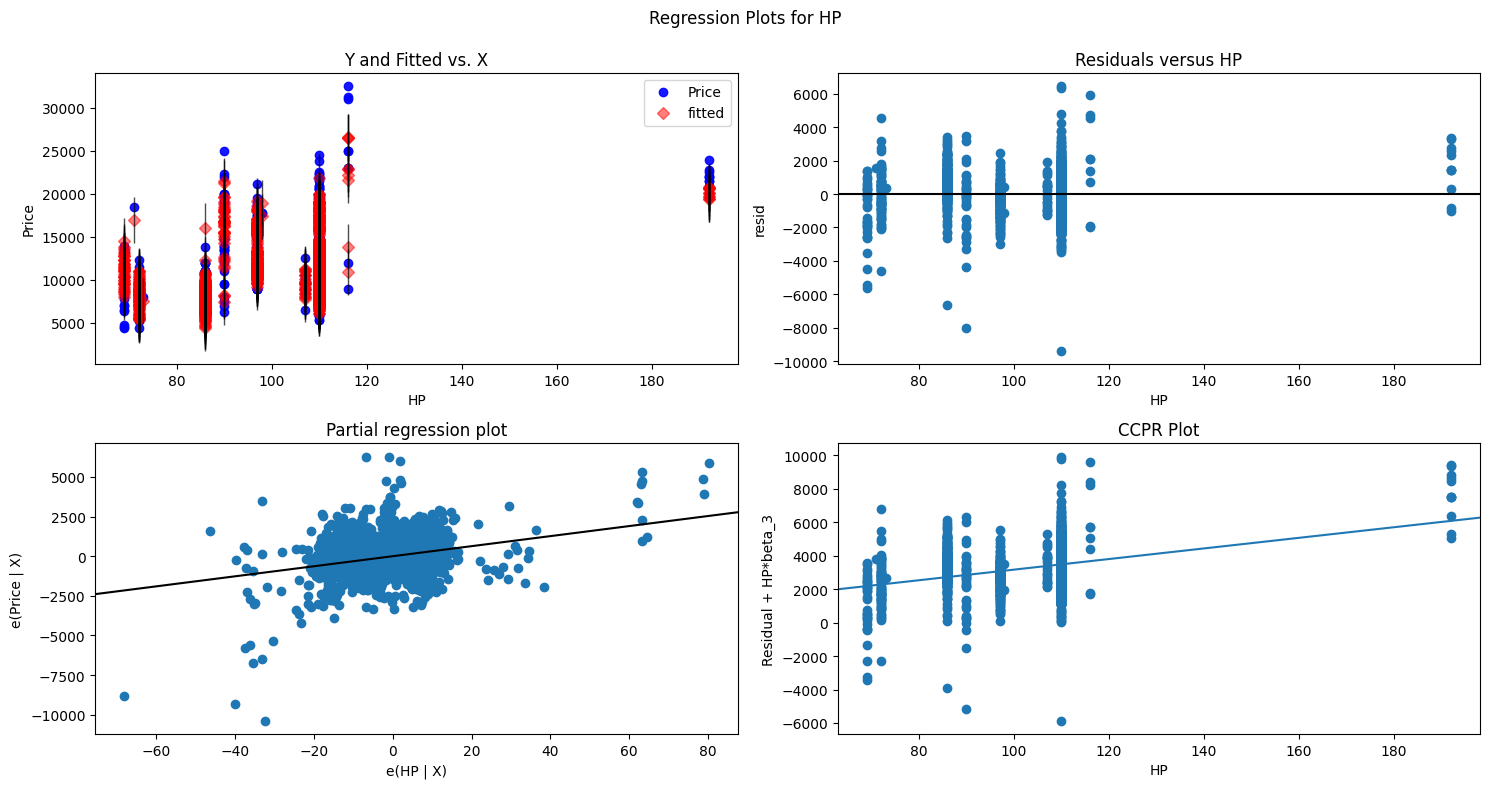

In [ ]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'HP',fig=fig);

eval_env: 1


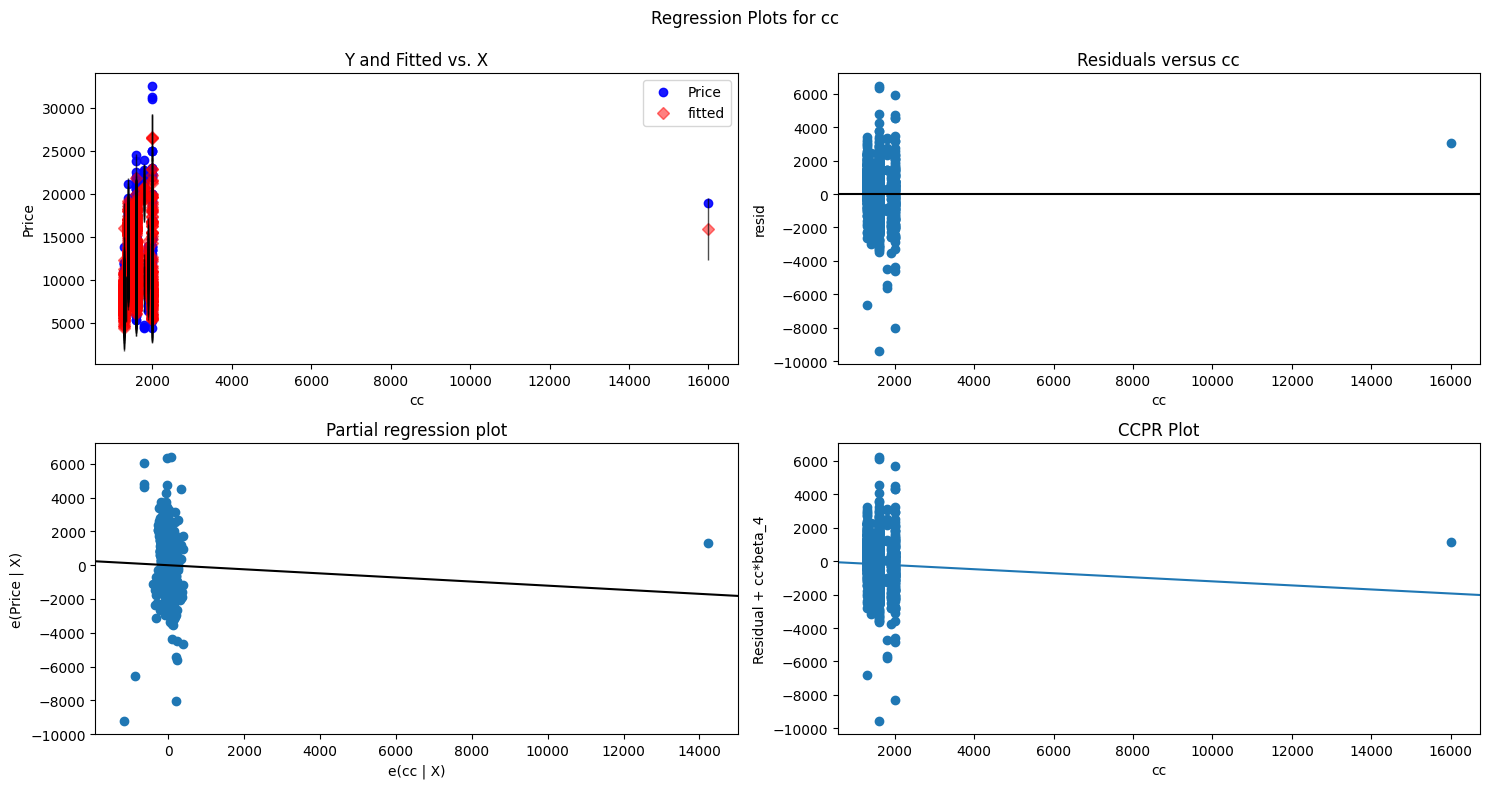

In [ ]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'cc',fig=fig);

eval_env: 1


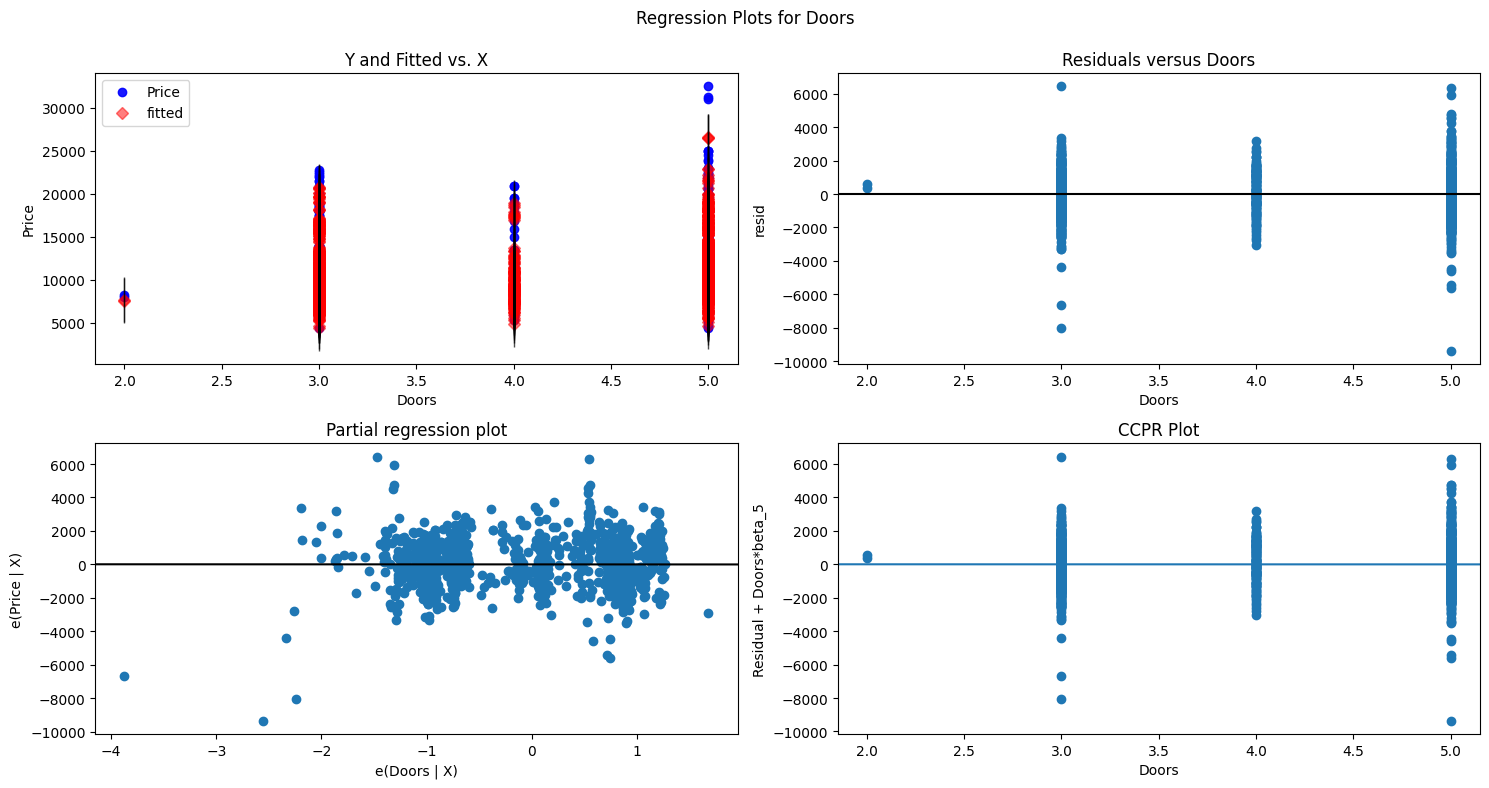

In [ ]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Doors',fig=fig);


eval_env: 1


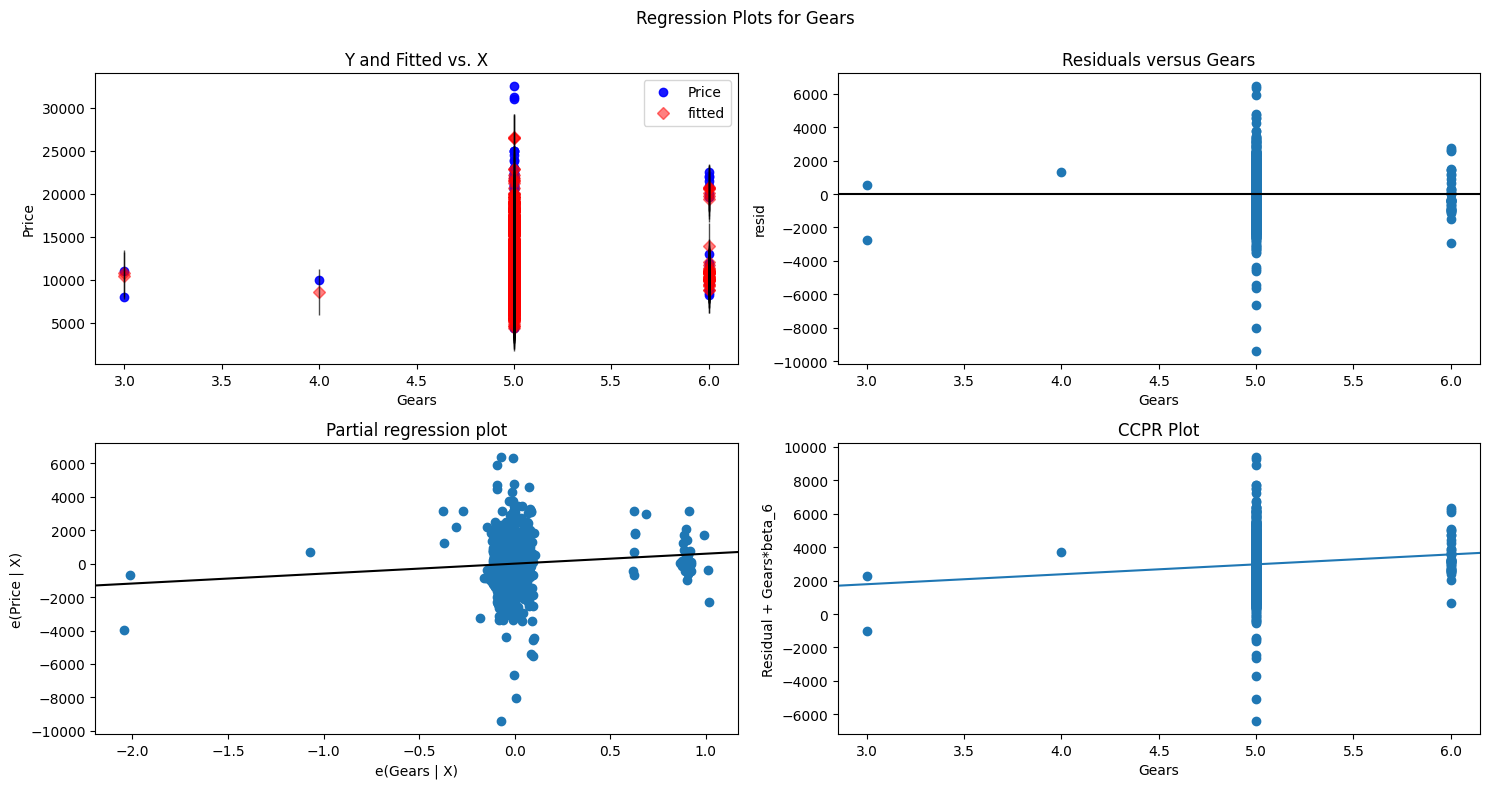

In [ ]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Gears',fig=fig);

eval_env: 1


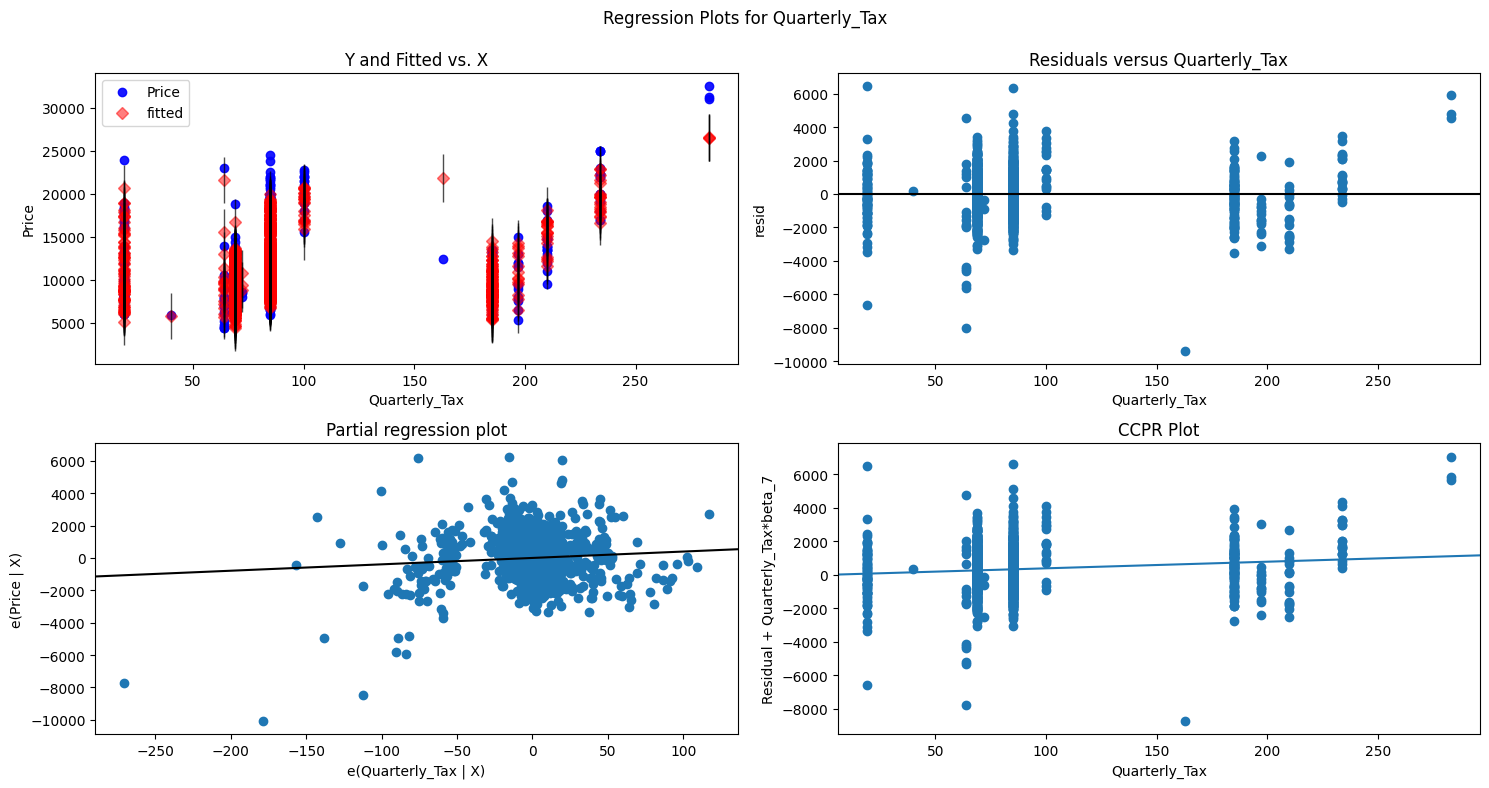

In [ ]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Quarterly_Tax',fig=fig);

eval_env: 1


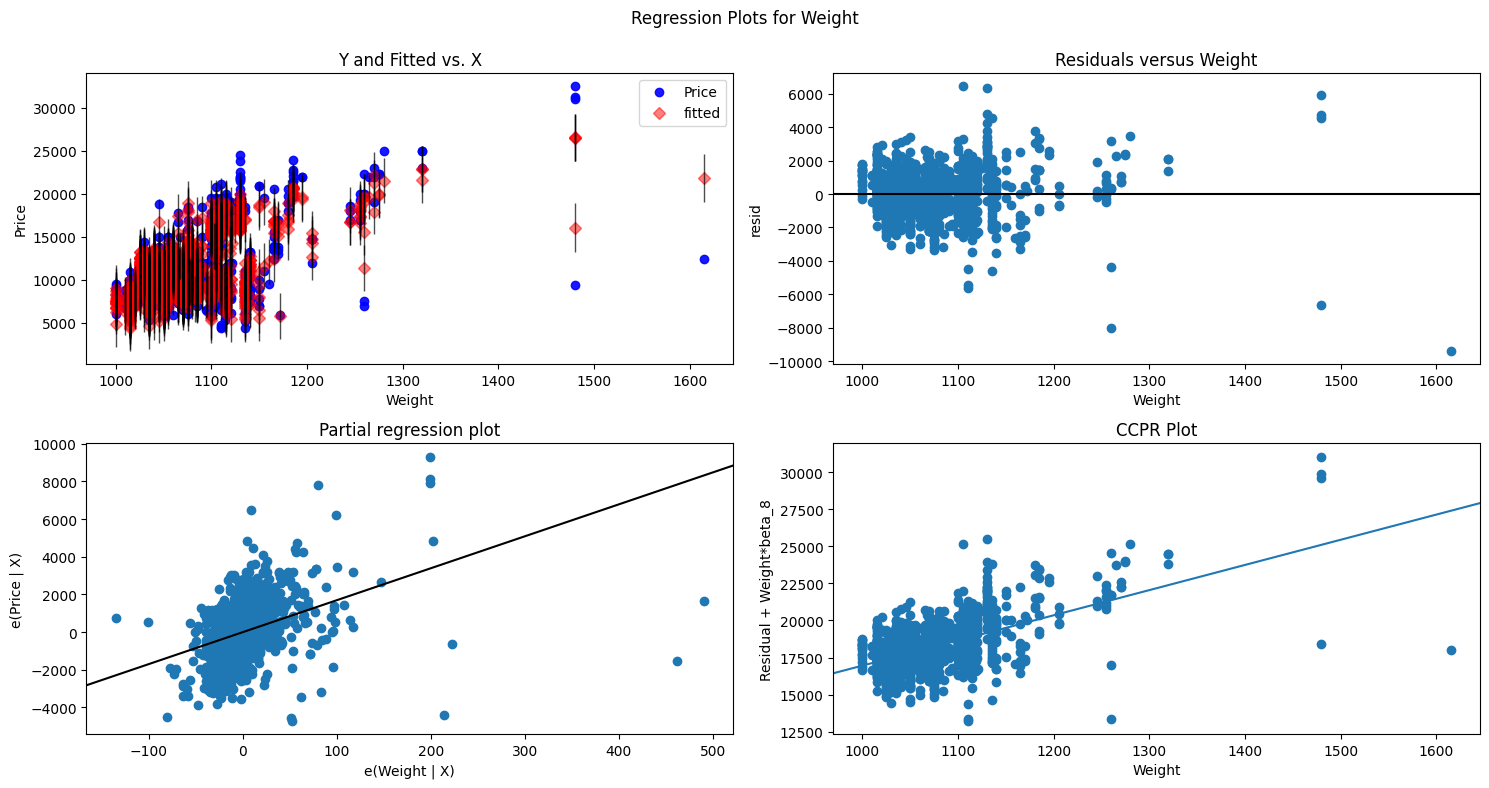

In [ ]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Weight',fig=fig);